# 0.&nbsp;Student Information
*   **Student ID:** 20521641
*   **Full Name:** Nguyễn Thị Ngọc Nga

# 1.&nbsp;Import Libraries

In [42]:
# To enable parsing of Python source code
import ast

# To calculate in linear algebra
import numpy as np

# To manage data in dataframe
import pandas as pd

# To draw chart types
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# Histogram Gradient Boosting Classifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Random Search for tuning model
from sklearn.model_selection import RandomizedSearchCV

# For min - max normalization (in need)
from sklearn.preprocessing import MinMaxScaler

# KFold, train - test split for model
from sklearn.model_selection import (KFold,
                                     train_test_split)

# To evaluate model prediction
from sklearn.metrics import (f1_score,
                             recall_score,
                             accuracy_score,
                             precision_score,
                             confusion_matrix,
                             classification_report,
                             precision_recall_fscore_support)

# 2.&nbsp;Load Data

In [44]:
# Set the file path for the cleaned dataset CSV file
dataset_path = "../../Experiment/Dataset/Cleaned/CreditScore_OneHot.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(dataset_path)

In [45]:
# Display the first few rows of the DataFrame to provide a quick overview of the data
df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,1,0,0,0,1,0,0,0,Good
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,4.0,...,0,1,0,0,0,0,1,0,0,Good
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,1,0,0,0,0,0,1,0,Good
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,0,1,0,0,0,0,0,0,1,Good
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,0,1,0,0,1,0,0,0,0,Good


# 3.&nbsp;Train - Test Split

In [46]:
# Split dataset to input features and output
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Print shape
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (100000, 56)
y shape: (100000,)


In [47]:
# Train test split with test size is 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print training set shape
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}\n")

# Print testing set shape
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (80000, 56)
y_train shape: (80000,)

X_test shape: (20000, 56)
y_test shape: (20000,)


# 4.&nbsp;Min - Max Normalization

In [48]:
# Initialize a Min-Max scaler with a range from 0 to 1
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data based on the parameters fitted from the training data
X_test_scaled = scaler.transform(X_test)

# 5.&nbsp;Run Model With Default Parameters

In [49]:
# Create a HistGradientBoostingClassifier with default parameters
histree = HistGradientBoostingClassifier()

# Get parameters of the HistGradientBoostingClassifier
params_dict = histree.get_params()

# Extract specific parameters of interest
early_stopping = params_dict['early_stopping']
l2_regularization = params_dict['l2_regularization']
learning_rate = params_dict['learning_rate']
max_depth = params_dict['max_depth']
max_leaf_nodes = params_dict['max_leaf_nodes']
min_samples_leaf = params_dict['min_samples_leaf']
warm_start = params_dict['warm_start']

# Display the extracted parameters with 'Parameter' as the index
pd.DataFrame({
    'Value': [early_stopping, l2_regularization, learning_rate, max_depth, max_leaf_nodes, min_samples_leaf, warm_start]
}, index=['early_stopping', 'l2_regularization', 'learning_rate', 'max_depth', 'max_leaf_nodes', 'min_samples_leaf', 'warm_start'])

,Value
early_stopping,auto
l2_regularization,0.0
learning_rate,0.1
max_depth,None
max_leaf_nodes,31
min_samples_leaf,20
warm_start,False


In [52]:
# Train the HistGradientBoostingClassifier on the training data 
# And make predictions on the test data
histree.fit(X_train_scaled, y_train)
y_pred = histree.predict(X_test_scaled)

# Print a classification report to evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.67      0.75      0.71      3527
        Poor       0.77      0.74      0.75      5874
    Standard       0.80      0.78      0.79     10599

    accuracy                           0.76     20000
   macro avg       0.75      0.76      0.75     20000
weighted avg       0.77      0.76      0.76     20000



In [53]:
# Display evaluation metrics
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Average Macro Precision : {precision_score(y_test, y_pred, average='macro'):.3f}")
print(f"Average Macro Recall : {recall_score(y_test, y_pred, average='macro'):.3f}")
print(f"Average Macro F1 : {f1_score(y_test, y_pred, average='macro'):.3f}")

Accuracy : 0.764
Average Macro Precision : 0.746
Average Macro Recall : 0.757
Average Macro F1 : 0.750


# 6.&nbsp;Tuning model

In [59]:
# Hyperparameter grid for fine-tuning the Histogram Gradient Boosting Classifier
param_grid = {
    # Learning rate controls the step size during optimization, affecting the convergence speed.
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.0002, 0.002, 0.02, 0.2, 0.0005, 0.005, 0.05, 0.5],

    # Max depth represents the maximum depth of the individual trees in the ensemble.
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],

    # L2 regularization adds a penalty term to the loss function to prevent overfitting.
    'l2_regularization': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],

    # Max leaf nodes limit the total number of leaf nodes in each tree, controlling model complexity.
    'max_leaf_nodes': [20, 25, 30, 35, 40, 45],

    # Min samples leaf sets the minimum number of samples required to be a leaf node.
    'min_samples_leaf': [10, 15, 20, 25, 30],

    # Early stopping determines whether to stop training when a performance metric stops improving.
    'early_stopping': [True, False],

    # Warm start allows training to be resumed from the existing solution, useful for incremental training.
    'warm_start': [True, False]
}


# Initialize RandomizedSearchCV with HistGradientBoostingClassifier and the hyperparameter grid
random_search = RandomizedSearchCV(histree,
                                   param_grid,
                                   n_iter=50,
                                   random_state=42,
                                   verbose=3)

random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END early_stopping=True, l2_regularization=0.2, learning_rate=0.01, max_depth=4, max_leaf_nodes=25, min_samples_leaf=20, warm_start=False;, score=0.706 total time=   3.4s
[CV 2/5] END early_stopping=True, l2_regularization=0.2, learning_rate=0.01, max_depth=4, max_leaf_nodes=25, min_samples_leaf=20, warm_start=False;, score=0.715 total time=   3.6s
[CV 3/5] END early_stopping=True, l2_regularization=0.2, learning_rate=0.01, max_depth=4, max_leaf_nodes=25, min_samples_leaf=20, warm_start=False;, score=0.709 total time=   3.7s
[CV 4/5] END early_stopping=True, l2_regularization=0.2, learning_rate=0.01, max_depth=4, max_leaf_nodes=25, min_samples_leaf=20, warm_start=False;, score=0.712 total time=   3.4s
[CV 5/5] END early_stopping=True, l2_regularization=0.2, learning_rate=0.01, max_depth=4, max_leaf_nodes=25, min_samples_leaf=20, warm_start=False;, score=0.704 total time=   3.6s
[CV 1/5] END early_stopping=True, l2_r

RandomizedSearchCV(estimator=HistGradientBoostingClassifier(), n_iter=50,
                   param_distributions={'early_stopping': [True, False],
                                        'l2_regularization': [0.0, 0.1, 0.2,
                                                              0.3, 0.4, 0.5],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 0.0002, 0.002,
                                                          0.02, 0.2, 0.0005,
                                                          0.005, 0.05, 0.5],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_leaf_nodes': [20, 25, 30, 35, 40,
                                                           45],
                                        'min_samples_leaf': [10, 15, 20, 25,
                                                             30],
                                        'warm_start': [True, False]},
                   random_state=42, verbose=3)

In [60]:
# Print the best parameters and the best accuracy on the validation set
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Parameters: {'warm_start': True, 'min_samples_leaf': 15, 'max_leaf_nodes': 45, 'max_depth': 9, 'learning_rate': 0.5, 'l2_regularization': 0.3, 'early_stopping': False}
Best Accuracy: 0.7917124999999999


In [61]:
# Extracting Random Search results information and converting it to a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Selecting important columns for analysis
selected_columns = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
results_df = results_df[selected_columns]

# Sorting the DataFrame based on rank_test_score in ascending order
results_df = results_df.sort_values(by='rank_test_score')

# Saving the selected DataFrame to a CSV file
results_df.to_csv('../../Experiment/Tuning/RandomizedSearchCV_HistogramGradientBoostingClassifier.csv', index=False)

# 7.&nbsp;Evaluation

## 7.1.&nbsp;Training And Testing

In [54]:
# Get the best parameters at the first row
# Then, convert them to dictionary type
histree_gscv = pd.read_csv("../../Experiment/Tuning/RandomizedSearchCV_HistogramGradientBoostingClassifier.csv")
best_params = ast.literal_eval(histree_gscv['params'][0])

In [55]:
# Create a HistGradientBoostingClassifier with best parameters
histree = HistGradientBoostingClassifier(**best_params)

# Get parameters from the HistGradientBoostingClassifier
params_dict = histree.get_params()

# Extract specific parameters of interest
early_stopping = params_dict['early_stopping']
l2_regularization = params_dict['l2_regularization']
learning_rate = params_dict['learning_rate']
max_depth = params_dict['max_depth']
max_leaf_nodes = params_dict['max_leaf_nodes']
min_samples_leaf = params_dict['min_samples_leaf']
warm_start = params_dict['warm_start']

# Display the extracted parameters with 'Parameter' as the index
pd.DataFrame({
    'Value': [early_stopping, l2_regularization, learning_rate, max_depth, max_leaf_nodes, min_samples_leaf, warm_start]
}, index=['early_stopping', 'l2_regularization', 'learning_rate', 'max_depth', 'max_leaf_nodes', 'min_samples_leaf', 'warm_start'])

,Value
early_stopping,False
l2_regularization,0.3
learning_rate,0.5
max_depth,9
max_leaf_nodes,45
min_samples_leaf,15
warm_start,True


In [56]:
# Train the HistGradientBoostingClassifier on the training data 
# And make predictions on the test data
histree.fit(X_train_scaled, y_train)
y_pred = histree.predict(X_test_scaled)

# Print a classification report to evaluate the performance of the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.77      0.77      0.77      3527
        Poor       0.79      0.81      0.80      5874
    Standard       0.82      0.81      0.82     10599

    accuracy                           0.80     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.80      0.80      0.80     20000



In [57]:
# Display evaluation metrics
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Average Macro Precision : {precision_score(y_test, y_pred, average='macro'):.3f}")
print(f"Average Macro Recall : {recall_score(y_test, y_pred, average='macro'):.3f}")
print(f"Average Macro F1 : {f1_score(y_test, y_pred, average='macro'):.3f}")

Accuracy : 0.804
Average Macro Precision : 0.795
Average Macro Recall : 0.797
Average Macro F1 : 0.796


## 7.2.&nbsp;Cross Validation (K-Fold)

In [58]:
# Plot accuracy, macro average precision, recall and f1 score
# Define class labels for better interpretation
target_names = ['Good', 'Poor', 'Standard']

# Initialize K-Fold cross-validator with 10 splits and shuffle the data
kf = KFold(n_splits=10, shuffle=True)

# List to store metrics for each fold
metrics = []

# Lists to store performance metrics across all folds
acc = []  # Accuracy
f1_macro = []  # Macro-average F1 score
recall_macro = []  # Macro-average recall
precision_macro = []  # Macro-average precision

# Initialize an array to store confusion matrices
confusion_matrices = np.zeros((3, 3))

# Iterate over each fold
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    
    # Apply Min-Max scaling to the training data for the current fold
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X[train_index])
    
    # Fit the HistGradientBoostingClassifier on the scaled training data
    histree.fit(X_train_scaled, y[train_index])
    
    # Apply Min-Max scaling to the test data for the current fold
    X_test_scaled = scaler.transform(X[test_index])
    
    # Predict the labels for the scaled test data
    y_pred = histree.predict(X_test_scaled)
    
    # Display the classification report with precision, recall, and F1 score
    print(classification_report(y[test_index], y_pred, target_names=target_names))
    
    # Calculate precision, recall, F1 score, and support for each class
    metrics.append(precision_recall_fscore_support(y[test_index], y_pred))
    print()
    
    # Calculate and store accuracy for the current fold
    acc.append(histree.score(X_test_scaled, y[test_index]))
    
    # Calculate and store macro-average F1 score for the current fold
    f1_macro.append(f1_score(y[test_index], y_pred, average="macro"))
    
    # Calculate and store macro-average recall for the current fold
    recall_macro.append(recall_score(y[test_index], y_pred, average="macro"))
    
    # Calculate and store macro-average precision for the current fold
    precision_macro.append(precision_score(y[test_index], y_pred, average="macro"))
    
    # Update the confusion matrix with the results from the current fold
    confusion_matrices += confusion_matrix(y[test_index], y_pred)

# Calculate and display the mean accuracy across all folds
print(f"Mean accuracy: {np.mean(acc):.3f}")

Fold 0:
              precision    recall  f1-score   support

        Good       0.89      0.92      0.91      1777
        Poor       0.90      0.92      0.91      2951
    Standard       0.93      0.91      0.92      5272

    accuracy                           0.91     10000
   macro avg       0.91      0.92      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Fold 1:
              precision    recall  f1-score   support

        Good       0.89      0.92      0.91      1812
        Poor       0.90      0.93      0.91      2910
    Standard       0.93      0.90      0.92      5278

    accuracy                           0.91     10000
   macro avg       0.91      0.92      0.91     10000
weighted avg       0.91      0.91      0.91     10000


Fold 2:
              precision    recall  f1-score   support

        Good       0.89      0.92      0.91      1794
        Poor       0.88      0.92      0.90      2933
    Standard       0.93      0.89      0.91      

## 7.3.&nbsp;Visualization

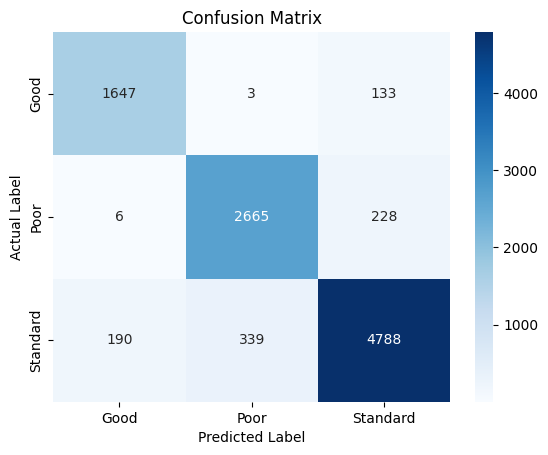

In [59]:
# Create labels for the confusion matrix
labels = ['Good', 'Poor', 'Standard']

# Create a heatmap using seaborn
sns.heatmap(np.round(confusion_matrices / 10).astype(np.int64), annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Set plot title and axes labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Display the plot
plt.show()

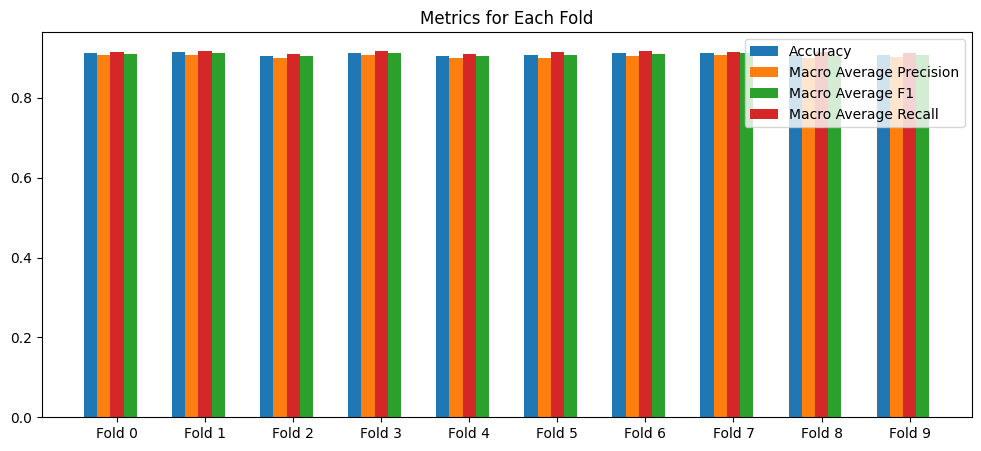

In [60]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Define labels for the x-axis (ticks) based on fold numbers
X_ticks = ["Fold " + str(i) for i in range(10)]

# Create an array representing the x-axis positions for the bars
X_axis = np.arange(len(X_ticks))

# Plot the bars for accuracy, macro-average F1, macro-average recall, and macro-average precision
# Each bar is positioned at its corresponding x-axis position
# The width of each bar is set to 0.15 for better visualization
plt.bar(X_axis - 0.3, acc, 0.15, label="Accuracy", tick_label=X_ticks)
plt.bar(X_axis - 0.15, precision_macro, 0.15, label="Macro Average Precision", tick_label=X_ticks)
plt.bar(X_axis + 0.15, f1_macro, 0.15, label="Macro Average F1", tick_label=X_ticks)
plt.bar(X_axis, recall_macro, 0.15, label="Macro Average Recall", tick_label=X_ticks)

# Set the title of the plot
plt.title("Metrics for Each Fold")

# Add a legend to the plot to identify each metric
plt.legend()

# Display the plot
plt.show()

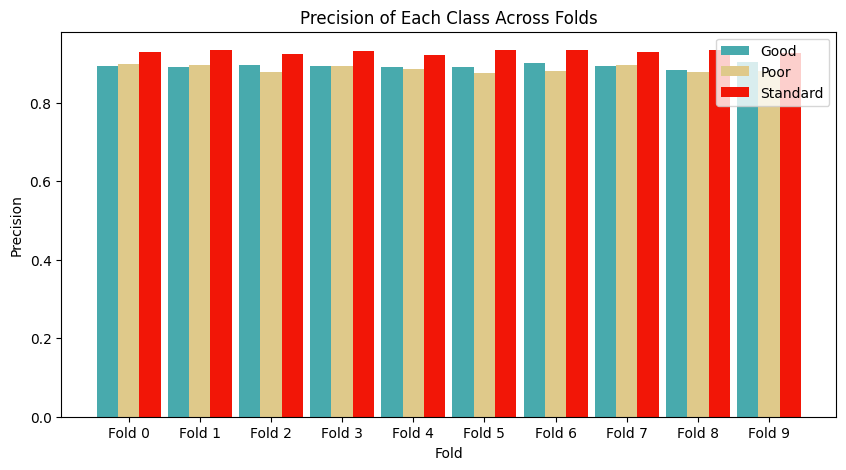

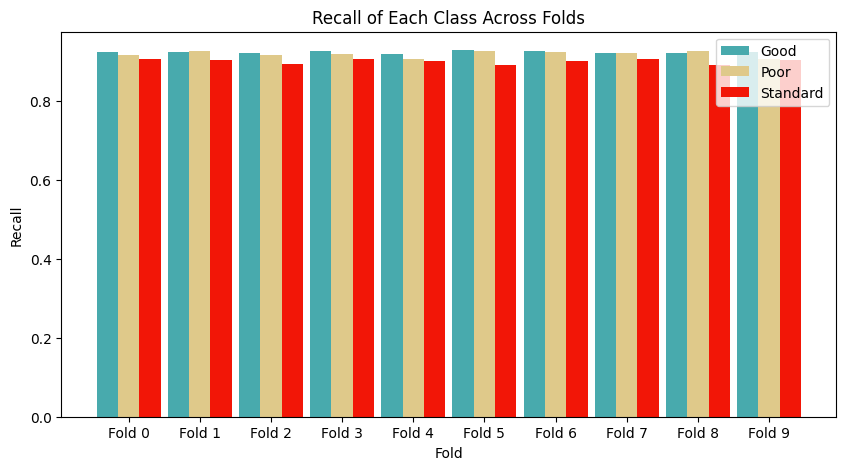

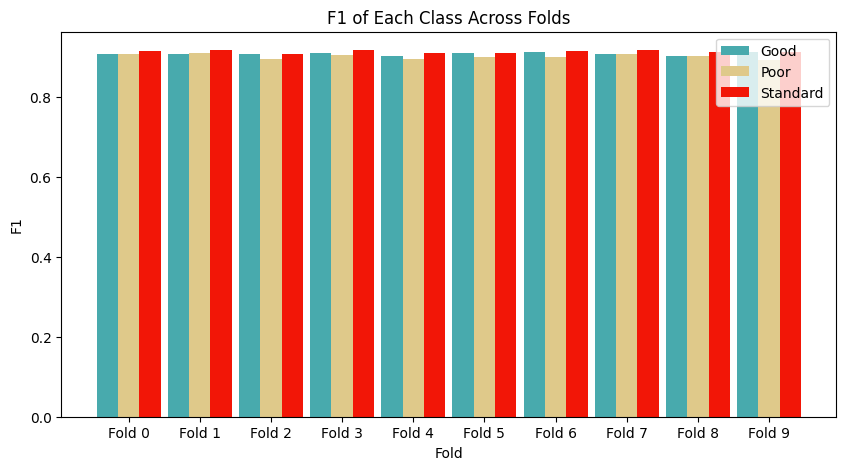

In [61]:
# Create a dictionary to store precision, recall, and F1 values for each class
metrics_dict = {
    "Precision": [],
    "Recall": [],
    "F1": []
}

# Extract precision, recall, and F1 values for each fold and class and store in the dictionary
for i in range(10):
    metrics_dict["Precision"].append(metrics[i][0])
    metrics_dict["Recall"].append(metrics[i][1])
    metrics_dict["F1"].append(metrics[i][2])

# Stack the precision, recall, and F1 values for each class vertically
# This is done to facilitate plotting using matplotlib
metrics_dict["Precision"] = np.vstack(metrics_dict["Precision"])
metrics_dict["Recall"] = np.vstack(metrics_dict["Recall"])
metrics_dict["F1"] = np.vstack(metrics_dict["F1"])

# Iterate over each metric and plot a grouped bar chart for each class
for metric, values in metrics_dict.items():
    plt.figure(figsize=(10, 5))

    # Plot bars for each class at their respective positions
    plt.bar(X_axis - 0.2, values[:, 0], 0.3, label="Good", color="#48AAAD")
    plt.bar(X_axis + 0.1, values[:, 1], 0.3, label="Poor", tick_label=X_ticks, color="#DFC98A")
    plt.bar(X_axis + 0.4, values[:, 2], 0.3, label="Standard", color="#f21607")

    # Set plot title, x-axis label, and y-axis label
    plt.title(f"{metric} of Each Class Across Folds")
    plt.xlabel("Fold")
    plt.ylabel(f"{metric}")

    # Add legend to identify each class
    plt.legend()

    # Display the plot
    plt.show()

In [62]:
print(f"Average Macro Precision : {np.mean(precision_macro):.3f}")
print(f"Average Macro Recall : {np.mean(recall_macro):.3f}")
print(f"Average Macro F1 : {np.mean(f1_macro):.3f}")

Average Macro Precision : 0.903
Average Macro Recall : 0.914
Average Macro F1 : 0.909


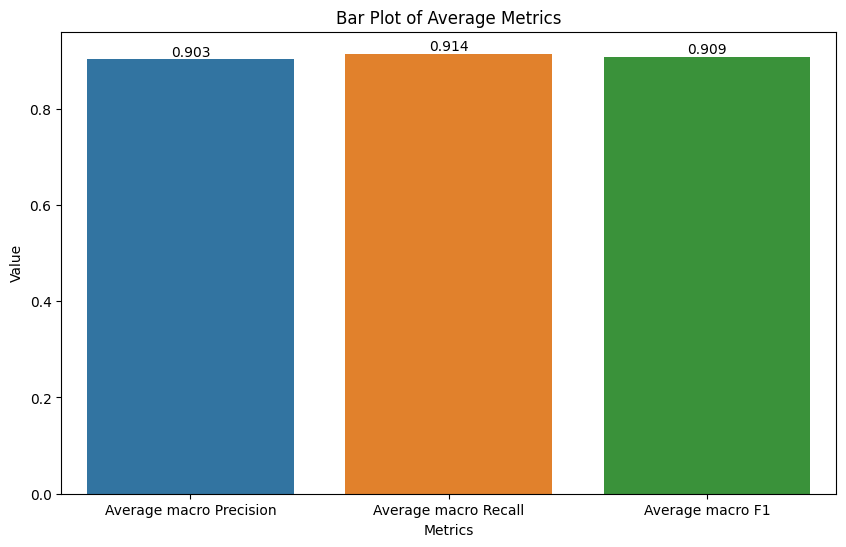

In [63]:
# Sample data
categories = ['Average macro Precision', 'Average macro Recall', 'Average macro F1']
values = [np.mean(precision_macro), np.mean(recall_macro), np.mean(f1_macro)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=categories, y=values)

# Add numbers on top of the bars
for i, v in enumerate(values):
    plt.text(i, v, str(round(v, 3)), ha='center', va='bottom')

# Set plot title and axes labels
plt.title('Bar Plot of Average Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')

# Display the plot
plt.show()